In [86]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import random
import time as tm
from scipy.optimize import curve_fit

In [87]:
baseline = []
with open("/Users/williamquinn/Desktop/Baseline.txt", "r") as file:
    fl = file.readlines()
    
    for i, line in enumerate(fl):
        line_list = line.split(" ")
        
        for j in range(len(line_list)):
            baseline.append(int(line_list[j].strip()))
baseline = np.array(baseline)

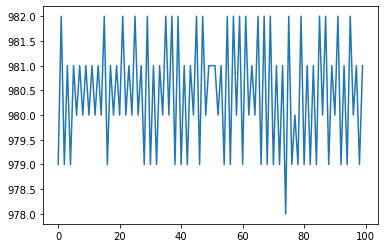

In [88]:
plt.plot(baseline[1000:1100])

980.5032977386935
1.1449536117942578


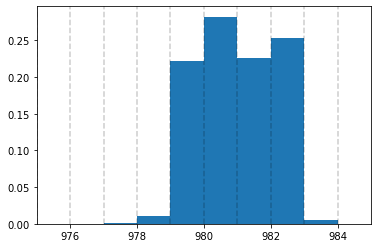

In [89]:
freq, bin_edges = np.histogram(baseline[800:], range=(975,985), bins=10)
bin_width = bin_edges[2] - bin_edges[1]
bin_centres = bin_edges[1:] - bin_width/2
plt.bar(bin_centres, freq/np.sum(freq), width=bin_width)
plt.xlim(975,985)
for i in range(975, 985):
    plt.axvline(i, ls='--', color='k', alpha=0.2)
print(np.average(baseline[800:]))
print(np.std(baseline[800:]))

<BarContainer object of 4420 artists>

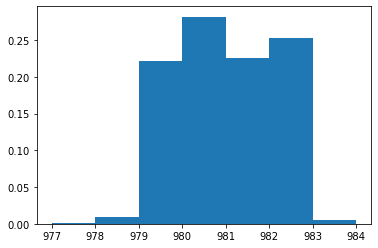

In [90]:
a = 977
b = 984
c = np.max(freq/np.sum(freq))
x = []
y = []
for i in range(10000):
    xi = random.randint(a, b)
    yi = random.uniform(0, c)
    
    if yi > (freq/np.sum(freq))[xi - 975]:
        continue
    
    x.append(xi)
    y.append(yi)
    
plt.bar(x + bin_width/2, y, width=1)

In [91]:
pdf_lower = (freq/np.sum(freq))[0:6]
pdf_higher = (freq/np.sum(freq))[6:]

waveform = []

for i in range(7000):
    if i % 2 == 0:
        for j in range(1000):
            xi = random.randint(a, 980)
            yi = random.uniform(0, c)
            
            if yi > pdf_lower[xi - 975]:
                continue
            else:
                break
        waveform.append(xi)
    else:
        for j in range(1000):
            xi = random.randint(981, 983)
            yi = random.uniform(0, c)
            
            if yi > pdf_higher[xi - 981]:
                continue
            else:
                break
        waveform.append(xi)

(1000.0, 1200.0)

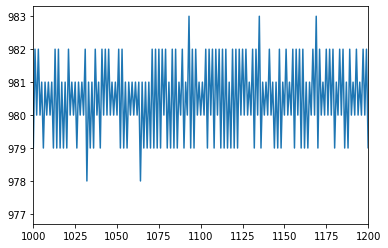

In [92]:
plt.plot(waveform)
plt.xlim(1000,1200)

980.5032977386935
1.1449536117942578


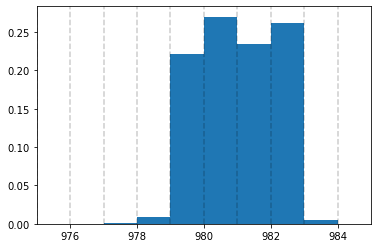

In [93]:
freq, bin_edges = np.histogram(waveform[800:], range=(975,985), bins=10)
bin_width = bin_edges[2] - bin_edges[1]
bin_centres = bin_edges[1:] - bin_width/2
plt.bar(bin_centres, freq/np.sum(freq), width=bin_width)
plt.xlim(975,985)
for i in range(975, 985):
    plt.axvline(i, ls='--', color='k', alpha=0.2)
print(np.average(baseline[800:]))
print(np.std(baseline[800:]))

TFile**		/Users/williamquinn/Desktop/SNEMO/200320_A1400_B1400_t0929_output.root	
 TFile*		/Users/williamquinn/Desktop/SNEMO/200320_A1400_B1400_t0929_output.root	
  KEY: TH1D	200320_GAO607_charge_spectrum_1400V;1	200320_GAO607_charge_spectrum_1400V
  KEY: TH1D	200320_GAO607_amplitude_spectrum_1400V;1	200320_GAO607_amplitude_spectrum_1400V
  KEY: TH1D	200320_GAO607_baseline_distribution_1400V;1	200320_GAO607_baseline_distribution_1400V
  KEY: TH1I	200320_GAO607_apulse_num_1400V;1	200320_GAO607_apulse_num_1400V
  KEY: TH1I	200320_GAO607_apulse_times_1400V;1	200320_GAO607_apulse_times_1400V
  KEY: TH1D	200320_GAO607_apulse_amplitudes_1400V;1	200320_GAO607_apulse_amplitudes_1400V
  KEY: TH1I	200320_GAO607_he_apulse_num_1400V;1	200320_GAO607_he_apulse_num_1400V
  KEY: TH1D	200320_GAO607_he_apulse_amplitudes_1400V;1	200320_GAO607_he_apulse_amplitudes_1400V
  KEY: TH1D	200320_GAO612_charge_spectrum_1400V;1	200320_GAO612_charge_spectrum_1400V
  KEY: TH1D	200320_GAO612_amplitude_spectrum_1400V;1

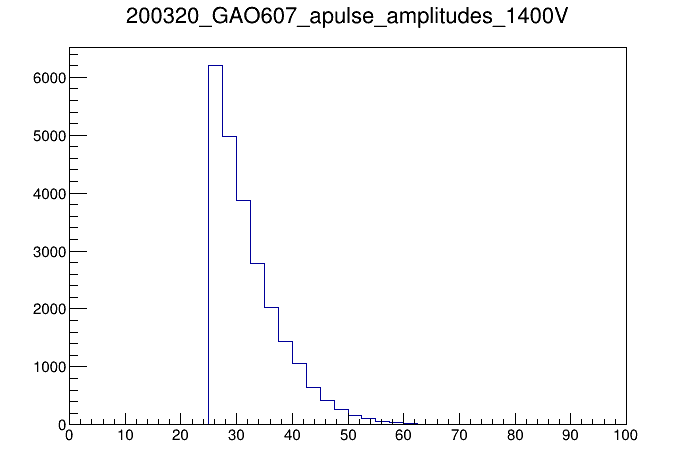

In [94]:
file = ROOT.TFile("/Users/williamquinn/Desktop/SNEMO/200320_A1400_B1400_t0929_output.root")
file.ls()
h_times = file.Get("200320_GAO607_apulse_times_1400V")
h_amplitudes = file.Get("200320_GAO607_apulse_amplitudes_1400V")
t = []
counts_t = []
for i in range(1, int(h_times.GetNbinsX())+1):
    t.append(i-1)
    counts_t.append(h_times.GetBinContent(i))
    
amps = []
counts_amps = []
for i in range(1, int(h_amplitudes.GetNbinsX())+1):
    amps.append( (i-1) * h_amplitudes.GetBinWidth(1))
    counts_amps.append(h_amplitudes.GetBinContent(i))
    
    
c = ROOT.TCanvas()
c.cd()
h_amplitudes.GetXaxis().SetRangeUser(0,100)
h_amplitudes.Draw()
c.Draw()

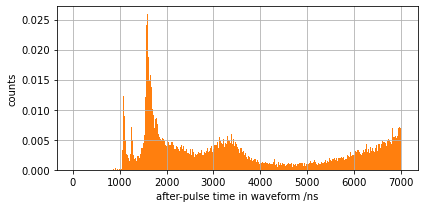

In [95]:
new_t = []
new_counts_t = []
j = 0
temp = 0
new_bin_width = 20
for i in range(len(t)):
    j += 1
    temp += counts_t[i]
    if j == new_bin_width:
        j = 0
        new_t.append(t[i])
        new_counts_t.append(temp)
        temp = 0
        
plt.figure(figsize=(6,3), facecolor='white')
plt.bar(np.array(new_t), new_counts_t/np.sum(new_counts_t), width =new_bin_width, color='C1')
plt.grid()
plt.xlabel('after-pulse time in waveform /ns')
plt.ylabel('counts')
plt.tight_layout()
# plt.savefig("/Users/williamquinn/Desktop/apulse_times_example.png")

In [96]:
counts_gen_t = []
for i in range(int(np.sum(counts_t)*10)):
    xi = random.randint(t[0], t[-1])
    yi = random.uniform(0, np.max(new_counts_t/np.sum(new_counts_t)))
    
    new_xi = xi // 20
    
    if yi > (new_counts_t/np.sum(new_counts_t))[new_xi]:
        continue
    
    else:
        counts_gen_t.append(xi)

(0.0, 7000.0)

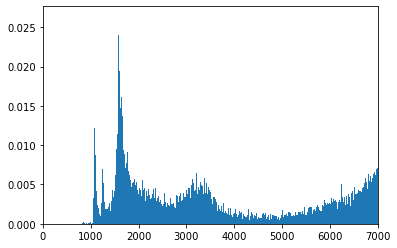

In [97]:
freq, bin_edges = np.histogram(counts_gen_t, range=(0,7000), bins=int(7000/20))
bin_width = bin_edges[2] - bin_edges[1]
bin_centres = bin_edges[1:] - bin_width/2
plt.bar(bin_centres, freq/np.sum(freq), width=bin_width)
plt.xlim(0,7000)

(25.0, 100.0)

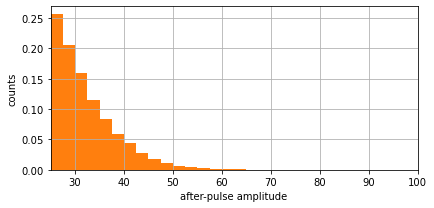

In [98]:
plt.figure(figsize=(6,3), facecolor='white')
plt.bar(np.array(amps) + 2.5/2, counts_amps/np.sum(counts_amps), width =2.5, color='C1')
plt.grid()
plt.xlabel('after-pulse amplitude')
plt.ylabel('counts')
plt.tight_layout()
plt.xlim(25,100)

[25.0, 27.5, 30.0, 32.5, 35.0, 37.5, 40.0, 42.5, 45.0, 47.5, 50.0, 52.5, 55.0, 57.5, 60.0, 62.5, 65.0, 67.5, 70.0, 72.5, 75.0, 77.5, 80.0, 82.5, 85.0, 87.5, 90.0, 92.5, 95.0, 97.5]


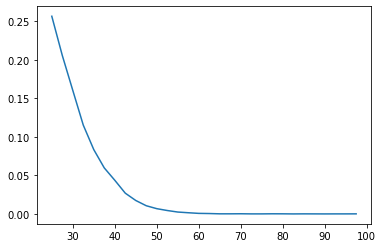

In [99]:
new_counts_amps = (counts_amps/np.sum(counts_amps))[10: 40]
print([(i*2.5) + 25 for i in range(len(new_counts_amps))])
plt.plot([(i*2.5) + 25 for i in range(len(new_counts_amps))], new_counts_amps)

In [100]:
counts_gen_amps = []
for i in range(int(np.sum(counts_amps)*10)):
    xi = random.uniform(25,100)
    yi = random.uniform(0, np.max(new_counts_amps))
    
    new_xi = xi // 2.5
    # print(xi,new_xi)
    
    if yi > (counts_amps/np.sum(counts_amps))[int(new_xi)]:
        continue
    else:
        counts_gen_amps.append(xi)

(25.0, 100.0)

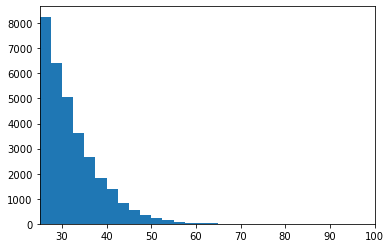

In [101]:
freq, bin_edges = np.histogram(counts_gen_amps, range=(25,100), bins=int((100-25)/2.5))
bin_width = bin_edges[2] - bin_edges[1]
bin_centres = bin_edges[1:] - bin_width/2
plt.bar(bin_centres, freq, width=bin_width)
plt.xlim(25,100)

TFile**		/Users/williamquinn/Desktop/SNEMO/pmt_short_templates.root	
 TFile*		/Users/williamquinn/Desktop/SNEMO/pmt_short_templates.root	
  KEY: TH1D	Template_Ch0;1	Template_Ch0
  KEY: TH1D	Template_Ch1;1	Template_Ch1


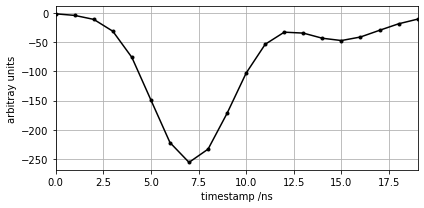

In [102]:
template_file = ROOT.TFile("/Users/williamquinn/Desktop/SNEMO/pmt_short_templates.root")
template_file.ls()
h_template = template_file.Get("Template_Ch0")
x_temp = []
y_temp = []

for i in range(1, h_template.GetNbinsX()+1):
    x_temp.append(i-1)
    y_temp.append(h_template.GetBinContent(i))
    # print(i, h_template.GetBinContent(i))

plt.figure(figsize=(6,3))
x_temp = np.array(x_temp, dtype='float')
y_temp = np.array(y_temp, dtype='float')
plt.plot(x_temp,y_temp/np.sqrt(np.sum(y_temp*y_temp))*500, 'k.-')
plt.ylabel('arbitray units')
plt.xlabel('timestamp /ns')
plt.grid()
plt.xlim(x_temp[0], x_temp[-1])
plt.tight_layout()
# plt.savefig("/Users/williamquinn/Desktop/template.png")

In [103]:
baselines = [[[] for i in range(1000)] for j in range(21)]

for l in range(len(baselines)):
    for k in range(len(baselines[l])):
        waveform = []

        for i in range(7000):
            if i % 2 == 0:
                for j in range(1000):
                    xi = random.randint(a, 980)
                    yi = random.uniform(0, np.max(pdf_lower))

                    if yi > pdf_lower[xi - 975]:
                        continue
                    else:
                        break
                waveform.append(float(xi))
            else:
                for j in range(1000):
                    xi = random.randint(981, 983)
                    yi = random.uniform(0, np.max(pdf_higher))

                    if yi > pdf_higher[xi - 981]:
                        continue
                    else:
                        break
                waveform.append(float(xi))
        baselines[l][k] = np.array(waveform)
    print(((l+1)/21) * 100, "%")
    
with open("/Users/williamquinn/Desktop/baselines.txt", 'w') as create_file:
    for i in range(100):
        create_file.write("#blank \n")
    for apulse_num in range(len(baselines)):
        for i_b in range(len(baselines[apulse_num])):
            string = '<trace channel="0">'
            for i in range(len(baselines[apulse_num][i_b])):
                string += ' {}'.format(baselines[apulse_num][i_b][i])
            string += ' \n'
            create_file.write(string)

4.761904761904762 %
9.523809523809524 %
14.285714285714285 %
19.047619047619047 %
23.809523809523807 %
28.57142857142857 %
33.33333333333333 %
38.095238095238095 %
42.857142857142854 %
47.61904761904761 %
52.38095238095239 %
57.14285714285714 %
61.904761904761905 %
66.66666666666666 %
71.42857142857143 %
76.19047619047619 %
80.95238095238095 %
85.71428571428571 %
90.47619047619048 %
95.23809523809523 %
100.0 %


KeyboardInterrupt: 

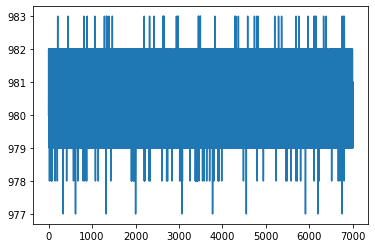

In [104]:
plt.plot(baselines[0][0])

In [105]:
template = y_temp/np.sqrt(np.dot(y_temp, y_temp))
apulse_times = [[[] for i in range(1000)] for j in range(21)]
apulse_amplitudes = [[[] for i in range(1000)] for j in range(21)]
for apulse_num in range(0, 21):
    for i_b in range(1000):
        baselines[apulse_num][i_b][590:590+template.size] += template*500
        for i_ap in range(apulse_num):
            time_bool = False
            time = 0
            while not time_bool:
                ti = random.randint(1400, 2000)
                y_ti = random.uniform(0, np.max(new_counts_t/np.sum(new_counts_t)))

                new_ti = ti // 20

                if y_ti > (new_counts_t/np.sum(new_counts_t))[new_ti]:
                    continue
                else:
                    time = ti
                    if apulse_num == 1:
                        apulse_times[apulse_num][i_b].append(time)
                        time_bool = True
                    else:
                        if i_ap == 0:
                            apulse_times[apulse_num][i_b].append(time)
                            time_bool = True
                        else:
                            if abs(time - apulse_times[apulse_num][i_b][i_ap - 1]) > 0:
                                # print("i_b",i_b,"i_ap", i_ap,"time", abs(time-apulse_times[i_ap]) )
                                apulse_times[apulse_num][i_b].append(time)
                                time_bool = True
                    
            amp_bool = False
            amp = 0
            while not amp_bool:
                ai = random.uniform(25, 100)
                y_ai = random.uniform(0, random.uniform(0, np.max(new_counts_amps)))
                
                new_ai = ai // 2.5
    
                if y_ai > (counts_amps/np.sum(counts_amps))[int(new_ai)]:
                    continue
                else:
                    amp = ai
                    #print("i_b",i_b,"i_ap", i_ap, "amp", amp)
                    apulse_amplitudes[apulse_num][i_b].append(amp)
                    amp_bool = True
            
            baselines[apulse_num][i_b][time:time + template.size] += template*amp
            
    print("finished apulse nums:",apulse_num, tm.asctime())

with open("/Users/williamquinn/Desktop/apulses.txt", 'w') as create_file:
    for i in range(100):
        create_file.write("#blank \n")
    for apulse_num in range(21):
        for i_b in range(1000):
            string = '<apulse times>'
            for i in range(len(apulse_times[apulse_num][i_b])):
                string += ' {}'.format(apulse_times[apulse_num][i_b][i])
            string += '<apulse amplitudes>'
            for i in range(len(apulse_amplitudes[apulse_num][i_b])):
                string += ' {}'.format(apulse_amplitudes[apulse_num][i_b][i])
            string += ' \n'
            create_file.write(string)

finished apulse nums: 0 Tue Sep 21 22:21:49 2021
finished apulse nums: 1 Tue Sep 21 22:21:49 2021
finished apulse nums: 2 Tue Sep 21 22:21:50 2021
finished apulse nums: 3 Tue Sep 21 22:21:52 2021
finished apulse nums: 4 Tue Sep 21 22:21:54 2021
finished apulse nums: 5 Tue Sep 21 22:21:56 2021
finished apulse nums: 6 Tue Sep 21 22:21:59 2021
finished apulse nums: 7 Tue Sep 21 22:22:03 2021
finished apulse nums: 8 Tue Sep 21 22:22:07 2021
finished apulse nums: 9 Tue Sep 21 22:22:11 2021
finished apulse nums: 10 Tue Sep 21 22:22:16 2021
finished apulse nums: 11 Tue Sep 21 22:22:22 2021
finished apulse nums: 12 Tue Sep 21 22:22:27 2021
finished apulse nums: 13 Tue Sep 21 22:22:34 2021
finished apulse nums: 14 Tue Sep 21 22:22:40 2021
finished apulse nums: 15 Tue Sep 21 22:22:47 2021
finished apulse nums: 16 Tue Sep 21 22:22:55 2021
finished apulse nums: 17 Tue Sep 21 22:23:03 2021
finished apulse nums: 18 Tue Sep 21 22:23:12 2021
finished apulse nums: 19 Tue Sep 21 22:23:21 2021
finished a

1000


(1400.0, 2000.0)

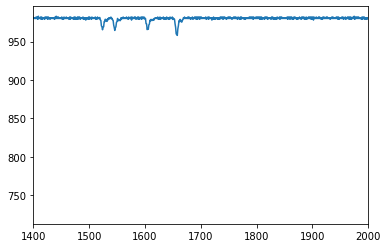

In [158]:
print(len(baselines[0]))
plt.plot(baselines[4][23])
plt.xlim(1400,2000)

In [107]:
with open("/Users/williamquinn/Desktop/A1400_B1400_t0000.txt", 'w') as create_file:
    for i in range(100):
        create_file.write("#blank \n")
    for apulse_num in range(len(baselines)):
        for i_b in range(len(baselines[apulse_num])):
            string = '<trace channel="0">'
            for i in range(len(baselines[apulse_num][i_b])):
                string += ' {}'.format(baselines[apulse_num][i_b][i])
            string += ' \n'
            create_file.write(string)

In [108]:
with open("/Users/williamquinn/Desktop/A1400_B1400_t0000.txt", 'r') as read_file:
    fl = read_file.readlines()
    waveforms = []
    for i, line in enumerate(fl):
        if i < 100:
            continue
        else:
            temp = []
            line_list = line.split(">")[-1].split(" ")
            for j in range(len(line_list)):
                if line_list[j] == '' or line_list[j] == '\n':
                    continue
                temp.append(float(line_list[j].strip()))
            waveforms.append(np.array(temp))

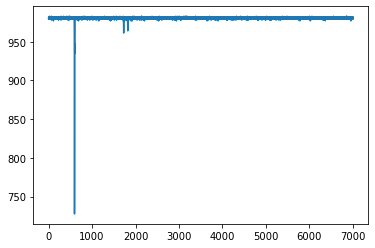

In [149]:
plt.plot(waveforms[2000])

In [160]:
def sweep( vec: np.array, baseline: float, temp: np.array ):
    temp_mf = {
        "apulse_amplitudes": [],
        "apulse_shapes": [],
        "apulse_times": [],
        #"mf_amps": [],
        #"mf_shapes": [],
        #"apulse_num": []
    }
    
    sweep_start = 1400
    shape_cut = 0.95
    amp_cut = 25
    apulse_time_cut = 20

    apulse_amp_vec = []
    apulse_shape_vec = []
    apulse_time_vec = []

    current_apulse = 0
    previous_apulse = 0

    # shape_convolution = []
    # amp_convolution = []

    for i_sweep in range(sweep_start, 2000):
        test = vec[i_sweep:i_sweep + temp.size] - baseline
        
        test_norm = np.sqrt(np.dot( test, test ))
        amplitude_index = np.dot( test, temp )
        shape_index = amplitude_index/test_norm
        
        # print(shape_index)
        
        # shape_convolution.append(shape_index)
        # amp_convolution.append(amplitude_index)

        if shape_index > shape_cut and amplitude_index > amp_cut:
            distance_to_nearest_afterpulse = i_sweep - previous_apulse
            if distance_to_nearest_afterpulse > apulse_time_cut:
                apulse_amp_vec.append( amplitude_index )
                apulse_shape_vec.append( shape_index )
                apulse_time_vec.append( i_sweep )
                previous_apulse = i_sweep
                current_apulse = len(apulse_amp_vec)-1
            else:
                if amplitude_index > apulse_amp_vec[current_apulse]:
                    apulse_amp_vec[current_apulse] = amplitude_index
                    apulse_shape_vec[current_apulse] = shape_index
                    apulse_time_vec[current_apulse] = i_sweep

    temp_mf['apulse_amplitudes'] = np.array(apulse_amp_vec)
    temp_mf['apulse_shapes'] = np.array(apulse_shape_vec)
    temp_mf['apulse_times'] = np.array(apulse_time_vec)
    # temp_mf['mf_amps'] = np.array(amp_convolution)
    # temp_mf['mf_shapes'] = np.array(shape_convolution)
    # temp_mf['apulse_num'] = np.array(apulse_time_vec).size
    return temp_mf

def get_baseline( waveform: np.array ):
    temp = 0
    for i in range(500):
        temp += waveform[i]
    return temp/500

In [167]:
print("input : output")
mfs = [[] for i in range(21)]
for i, waveform in enumerate(waveforms):
    apn = i // 1000
    i_b = i % 1000
    baseline = get_baseline(waveform)
    mf = sweep(waveform, baseline, template)
    '''if apn != mf["apulse_num"]:
        print("num:",apn,"times:",apulse_times[apn][i_b],"num",mf["apulse_num"],"times:",mf["apulse_times"])'''
    mfs[apn].append(mf)
    if (i+1) % 2100 == 0:
        print((i+1)* 100/len(waveforms), "%", tm.asctime()) 

input : output
10.0 % Tue Sep 21 23:39:05 2021
20.0 % Tue Sep 21 23:39:12 2021
30.0 % Tue Sep 21 23:39:19 2021
40.0 % Tue Sep 21 23:39:28 2021
50.0 % Tue Sep 21 23:39:35 2021
60.0 % Tue Sep 21 23:39:43 2021
70.0 % Tue Sep 21 23:39:51 2021
80.0 % Tue Sep 21 23:39:59 2021
90.0 % Tue Sep 21 23:40:06 2021
100.0 % Tue Sep 21 23:40:14 2021


In [165]:
len(mfs)

21

In [170]:
with open("/Users/williamquinn/Desktop/apulses_processed.txt", 'w') as create_file:
    for i in range(100):
        create_file.write("#blank \n")
    for apulse_num in range(21):
        for i_b in range(1000):
            string = '<apulse times>'
            for i in range(len(mfs[apulse_num][i_b]["apulse_times"])):
                string += ' {}'.format(mfs[apulse_num][i_b]["apulse_times"][i])
            string += '<apulse amplitudes>'
            for i in range(len(mfs[apulse_num][i_b]['apulse_amplitudes'])):
                string += ' {}'.format(mfs[apulse_num][i_b]["apulse_amplitudes"][i])
            string += ' \n'
            create_file.write(string)

In [172]:
successes = [0 for i in range(21)]
failures = [0 for i in range(21)]
for ap in range(21):
    success = 0
    failure = 0
    for ib in range(1000):
        if ap != len(mfs[ap][ib]["apulse_times"]):
            failure += 1
        else:
            success += 1
    successes[ap] = (success/1000) *100
    failures[ap] = (failure/1000) *100
    
with open("/Users/williamquinn/Desktop/matrix.txt", 'w') as create_file:
    create_file.write('successes,failures \n')
    for apulse_num in range(21):
        string = '{},{} \n'.format(successes[apulse_num],failures[apulse_num])     
        create_file.write(string)